# Week 4

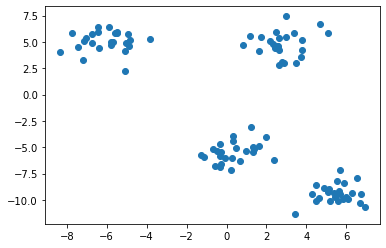

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100,
                  centers=4, 
                  cluster_std=1, 
                  random_state=10
                 )
plt.scatter(X[:, 0], X[:, 1]);

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4)
km.fit(X)
km.labels_

array([3, 1, 3, 1, 0, 2, 2, 3, 0, 2, 3, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2,
       1, 3, 2, 2, 2, 0, 3, 1, 2, 2, 0, 2, 2, 0, 3, 1, 3, 1, 1, 1, 1, 0,
       3, 3, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 1, 1, 3, 0, 1, 1, 2, 2, 1,
       0, 1, 0, 3, 3, 2, 1, 0, 2, 2, 3, 1, 2, 3, 0, 0, 1, 1, 0, 3, 1, 3,
       1, 3, 0, 3, 3, 1, 1, 1, 3, 3, 3, 3], dtype=int32)

In [6]:
km.cluster_centers_

array([[ 5.49855163, -9.40880959],
       [ 2.79419702,  4.79694276],
       [ 0.348301  , -5.45307298],
       [-6.04098578,  5.06798706]])

In [5]:
X

array([[ -5.57785425,   5.87298826],
       [  1.62783216,   4.17806883],
       [ -6.37184387,   4.41922347],
       [  1.75005543,   5.44582908],
       [  6.55010412,  -7.9123388 ],
       [ -0.66982236,  -5.19023657],
       [  0.48085466,  -5.08976945],
       [ -7.45962322,   4.53166747],
       [  5.55912116, -10.06110303],
       [ -1.25569573,  -5.72586023],
       [ -5.03188157,   4.91618824],
       [  1.31006656,  -5.47475738],
       [  6.68288513, -10.31693051],
       [  0.6769707 ,  -6.29133602],
       [  5.69192445,  -9.47641249],
       [ -0.07790108,  -5.98485443],
       [  6.2686376 ,  -9.38138022],
       [  2.61105267,   4.22218469],
       [  6.91094987, -10.6647659 ],
       [ -1.15296379,  -5.89279504],
       [ -0.31748917,  -6.86337766],
       [  1.20634557,  -3.03874201],
       [  2.44078244,   4.47434875],
       [ -7.06349567,   5.37101341],
       [  0.34789333,  -3.88965912],
       [  0.99265635,  -5.33725682],
       [  0.26308097,  -5.97487434],
 

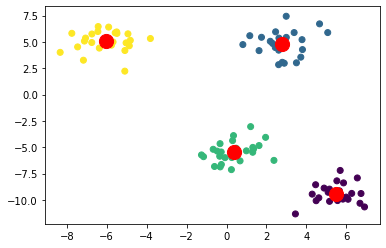

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c='r',
            marker='o',
            s=200
           );

## Searching for the optimal number of clusters with the elbow method

Inertia is the sum of squared distance from each data point to the center of its cluster. Smaller inertia means that clusters are more tightly organized. 

In [10]:
km.inertia_

187.49933118261387

In [13]:
km2 = KMeans(n_clusters=2)
km2.fit(X)
km2.inertia_

1691.3350029252008

Idea: try different numbers of clusters, check how inertia is changing. 

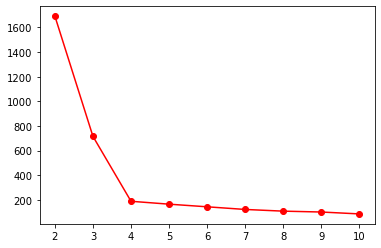

In [15]:
inertia_list = []
for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.plot(range(2, 11), inertia_list, 'ro-');

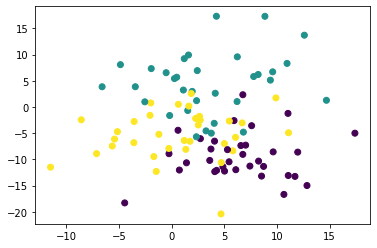

In [16]:
X, y = make_blobs(n_samples=100,
                  centers=3, 
                  cluster_std=5, 
                  random_state=10
                 )
plt.scatter(X[:, 0], X[:, 1], c=y);

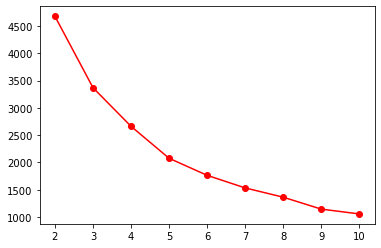

In [17]:
inertia_list = []
for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.plot(range(2, 11), inertia_list, 'ro-');

## Project 2

In [18]:
km

KMeans(n_clusters=10)

In [20]:
km.transform(X)

array([[16.75494251, 16.61493925, 21.18778656,  8.13994105, 15.68793953,
        26.63742076, 25.92456949, 22.17095862, 14.02963681, 34.1182112 ],
       [ 2.3157333 ,  8.07063441,  8.61876223,  8.72593814,  4.95748316,
        10.8464402 ,  9.5273581 , 12.74197984, 17.06343243, 19.4935828 ],
       [ 4.47937032, 10.17266727,  6.60877727,  9.10117287,  3.02683895,
        12.16827611,  8.99505325, 14.90505377, 18.73362464, 18.19580115],
       [ 7.65586021,  2.59484061, 18.4452566 , 12.30480412, 14.59562841,
        10.73229532, 16.50174014,  3.42868185, 10.8999757 , 27.40252879],
       [11.89859662, 17.66184516,  1.34394996, 14.68756066,  6.16526106,
        16.72063105,  8.96216263, 22.04537497, 25.90500139, 13.19430766],
       [ 6.11260483, 11.30750146,  7.37586384, 13.65212662,  7.52868542,
         8.14407907,  4.67584359, 14.2104449 , 21.28362064, 15.24959959],
       [ 9.86428016,  4.57317535, 20.63275151, 14.00619139, 16.79151853,
        11.84027405, 18.3901423 ,  2.23203731

In [21]:
from pathlib import Path
import requests
import numpy as np
import gzip

mnist_url = "http://yann.lecun.com/exdb/mnist/"
img_file = "train-images-idx3-ubyte.gz"
labels_file = "train-labels-idx1-ubyte.gz"

for fname in [img_file, labels_file]:
    if Path(fname).is_file() :
        print(f"Found: {fname}")
        continue
    print(f"Downloading: {fname}")
    r = requests.get(mnist_url + fname)
    with open(fname, 'wb') as foo:
        foo.write(r.content)

with gzip.open(img_file, 'rb') as foo:
    f = foo.read()
images = np.array([b for b in f[16:]]).reshape(-1, 28*28)

with gzip.open(labels_file, 'rb') as foo:
    f = foo.read()
labels = np.array([b for b in f[8:]])

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [22]:
images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
labels

array([5, 0, 4, ..., 5, 6, 8])

In [24]:
images = images[:5000]
labels = labels[:5000]

km  = KMeans(n_clusters=2)
km.fit(images)

KMeans(n_clusters=2)

In [26]:
reduced = km.transform(images)
reduced

array([[1881.19641716, 1826.21606123],
       [2154.46745948, 1740.15736307],
       [1929.54455919, 2069.64256587],
       ...,
       [2041.06512567, 1827.45759362],
       [1302.81517557, 1820.48677329],
       [1764.73986247, 1867.56544165]])

In [43]:
sns.__version__

'0.11.2'

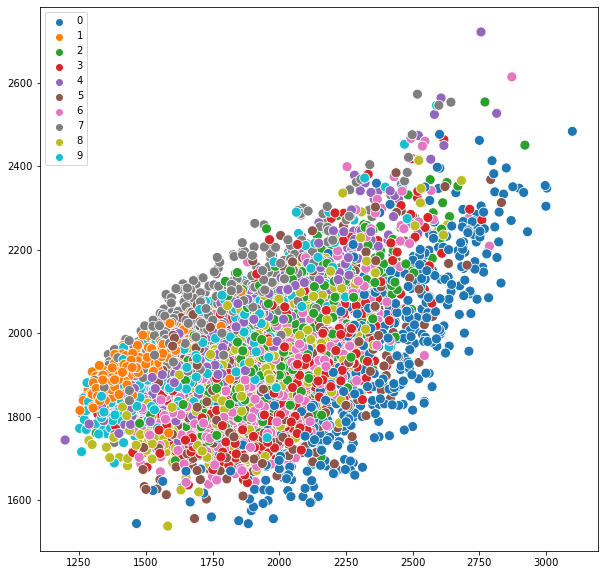

In [30]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x = reduced[:, 0],
                y = reduced[:, 1],
                hue=labels,
                palette='tab10',
                s=100
);

In [34]:
selection = np.isin(labels, [1, 2])
selection

array([False, False, False, ...,  True,  True,  True])

In [39]:
reduced[selection, 0].shape

(1051,)

In [40]:
reduced[selection, 1].shape

(1051,)

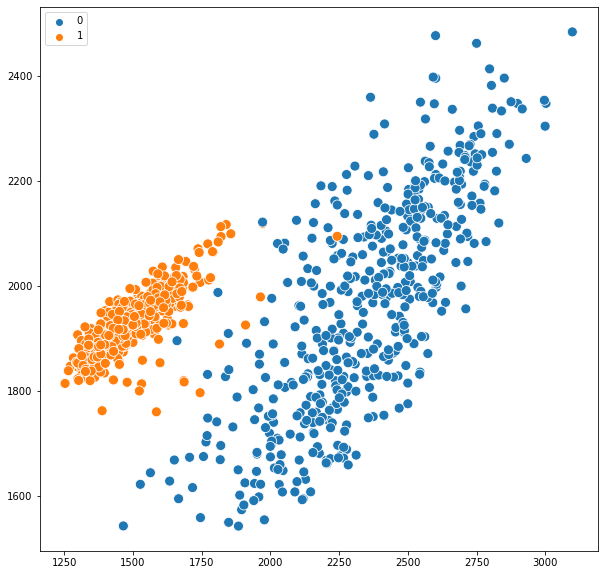

In [42]:
selection = np.isin(labels, [0, 1])

plt.figure(figsize=(10,10))
sns.scatterplot(x = reduced[selection, 0],
                y = reduced[selection, 1],
                hue=labels[selection],
                palette='tab10',
                s=100
);

## Pandas

In [1]:
import pandas as pd

In [2]:
planets = ["Mercury", "Venus", "Earth", "Mars", "Jupyter", "Saturn", "Uranus", "Neptune"]
diameters = [4879, 12104, 12756, 6792, 142984, 120536, 51118, 49528]
temperatures = [167, 464, 15, -65, -110, -140, -195, -200]
gravity = [3.7, 8.9, 9.8, 3.7, 23.1, 9.0, 8.7, 11.0]

### Series

In [3]:
s = pd.Series(diameters)
s

0      4879
1     12104
2     12756
3      6792
4    142984
5    120536
6     51118
7     49528
dtype: int64

In [4]:
s = pd.Series(diameters, index=planets)
s

Mercury      4879
Venus       12104
Earth       12756
Mars         6792
Jupyter    142984
Saturn     120536
Uranus      51118
Neptune     49528
dtype: int64

In [5]:
s['Mars']

6792

In [6]:
s[['Mars', 'Earth']]

Mars      6792
Earth    12756
dtype: int64

In [7]:
s['Earth':'Saturn']

Earth       12756
Mars         6792
Jupyter    142984
Saturn     120536
dtype: int64

In [8]:
s['Pluto'] = 2370
s

Mercury      4879
Venus       12104
Earth       12756
Mars         6792
Jupyter    142984
Saturn     120536
Uranus      51118
Neptune     49528
Pluto        2370
dtype: int64

In [9]:
s.mean()

44785.22222222222

In [10]:
s.max()

142984

In [11]:
s.min()

2370

In [12]:
s.argmax()

4

In [13]:
s.idxmax()

'Jupyter'

In [14]:
s/1.61

Mercury     3030.434783
Venus       7518.012422
Earth       7922.981366
Mars        4218.633540
Jupyter    88809.937888
Saturn     74867.080745
Uranus     31750.310559
Neptune    30762.732919
Pluto       1472.049689
dtype: float64

In [4]:
def size(x):
    if x < 10000:
        return "small"
    else:
        return "large"

In [5]:
s.apply(size)

0    small
1    large
2    large
3    small
4    large
5    large
6    large
7    large
dtype: object

### DataFrame

In [22]:
df = pd.DataFrame(
    {"diameter": diameters,
     "temperature": temperatures,
     "gravity": gravity
    }
)

df

diameter  temperature  gravity
0      4879          167      3.7
1     12104          464      8.9
2     12756           15      9.8
3      6792          -65      3.7
4    142984         -110     23.1
5    120536         -140      9.0
6     51118         -195      8.7
7     49528         -200     11.0

In [23]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [24]:
df.index = planets
df

diameter  temperature  gravity
Mercury      4879          167      3.7
Venus       12104          464      8.9
Earth       12756           15      9.8
Mars         6792          -65      3.7
Jupyter    142984         -110     23.1
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

In [26]:
df.index

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupyter', 'Saturn', 'Uranus',
       'Neptune'],
      dtype='object')

In [27]:
df.columns

Index(['diameter', 'temperature', 'gravity'], dtype='object')

In [28]:
df.head(3)

diameter  temperature  gravity
Mercury      4879          167      3.7
Venus       12104          464      8.9
Earth       12756           15      9.8

In [29]:
df.tail(3)

diameter  temperature  gravity
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

In [30]:
df.sample(3)

diameter  temperature  gravity
Neptune     49528         -200     11.0
Venus       12104          464      8.9
Mercury      4879          167      3.7

In [31]:
df['gravity']

Mercury     3.7
Venus       8.9
Earth       9.8
Mars        3.7
Jupyter    23.1
Saturn      9.0
Uranus      8.7
Neptune    11.0
Name: gravity, dtype: float64

In [32]:
df[['gravity', 'diameter']]

gravity  diameter
Mercury      3.7      4879
Venus        8.9     12104
Earth        9.8     12756
Mars         3.7      6792
Jupyter     23.1    142984
Saturn       9.0    120536
Uranus       8.7     51118
Neptune     11.0     49528

### loc and iloc

In [33]:
df.loc['Earth', 'gravity']

9.8

In [34]:
df.loc[['Earth', 'Mars'], 'gravity']

Earth    9.8
Mars     3.7
Name: gravity, dtype: float64

In [35]:
df.loc[['Earth', 'Mars'], ['gravity', 'temperature']]

gravity  temperature
Earth      9.8           15
Mars       3.7          -65

In [37]:
df.iloc[0, 1]

167

In [38]:
df.iloc[0]

diameter       4879.0
temperature     167.0
gravity           3.7
Name: Mercury, dtype: float64

In [39]:
df[2:5]

diameter  temperature  gravity
Earth       12756           15      9.8
Mars         6792          -65      3.7
Jupyter    142984         -110     23.1

In [41]:
df.iloc[2:5, [0, 1]]

diameter  temperature
Earth       12756           15
Mars         6792          -65
Jupyter    142984         -110

### Boolean indexing

In [42]:
df

diameter  temperature  gravity
Mercury      4879          167      3.7
Venus       12104          464      8.9
Earth       12756           15      9.8
Mars         6792          -65      3.7
Jupyter    142984         -110     23.1
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

In [43]:
df['diameter'] > 10000

Mercury    False
Venus       True
Earth       True
Mars       False
Jupyter     True
Saturn      True
Uranus      True
Neptune     True
Name: diameter, dtype: bool

In [44]:
df[df['diameter'] > 10000]

diameter  temperature  gravity
Venus       12104          464      8.9
Earth       12756           15      9.8
Jupyter    142984         -110     23.1
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

In [45]:
df[(df['temperature'] > 0) & (df['gravity'] > 5)]

diameter  temperature  gravity
Venus     12104          464      8.9
Earth     12756           15      9.8

In [46]:
df[(df['temperature'] > 0) | (df['temperature'] < -100)]

diameter  temperature  gravity
Mercury      4879          167      3.7
Venus       12104          464      8.9
Earth       12756           15      9.8
Jupyter    142984         -110     23.1
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

In [47]:
df[~(df['temperature'] > 0)]

diameter  temperature  gravity
Mars         6792          -65      3.7
Jupyter    142984         -110     23.1
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

### Sorting

In [48]:
df

diameter  temperature  gravity
Mercury      4879          167      3.7
Venus       12104          464      8.9
Earth       12756           15      9.8
Mars         6792          -65      3.7
Jupyter    142984         -110     23.1
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Neptune     49528         -200     11.0

In [50]:
df.sort_values(by='gravity', ascending=False)

diameter  temperature  gravity
Jupyter    142984         -110     23.1
Neptune     49528         -200     11.0
Earth       12756           15      9.8
Saturn     120536         -140      9.0
Venus       12104          464      8.9
Uranus      51118         -195      8.7
Mercury      4879          167      3.7
Mars         6792          -65      3.7

In [51]:
df.sort_index()

diameter  temperature  gravity
Earth       12756           15      9.8
Jupyter    142984         -110     23.1
Mars         6792          -65      3.7
Mercury      4879          167      3.7
Neptune     49528         -200     11.0
Saturn     120536         -140      9.0
Uranus      51118         -195      8.7
Venus       12104          464      8.9

In [52]:
df['temp_F'] = df['temperature']*1.8 + 32
df

diameter  temperature  gravity  temp_F
Mercury      4879          167      3.7   332.6
Venus       12104          464      8.9   867.2
Earth       12756           15      9.8    59.0
Mars         6792          -65      3.7   -85.0
Jupyter    142984         -110     23.1  -166.0
Saturn     120536         -140      9.0  -220.0
Uranus      51118         -195      8.7  -319.0
Neptune     49528         -200     11.0  -328.0

In [53]:
df.columns

Index(['diameter', 'temperature', 'gravity', 'temp_F'], dtype='object')

In [57]:
df1 = df[['diameter', 'temperature', 'temp_F', 'gravity']]
df1

diameter  temperature  temp_F  gravity
Mercury      4879          167   332.6      3.7
Venus       12104          464   867.2      8.9
Earth       12756           15    59.0      9.8
Mars         6792          -65   -85.0      3.7
Jupyter    142984         -110  -166.0     23.1
Saturn     120536         -140  -220.0      9.0
Uranus      51118         -195  -319.0      8.7
Neptune     49528         -200  -328.0     11.0

In [55]:
df

diameter  temperature  gravity  temp_F
Mercury      4879          167      3.7   332.6
Venus       12104          464      8.9   867.2
Earth       12756           15      9.8    59.0
Mars         6792          -65      3.7   -85.0
Jupyter    142984         -110     23.1  -166.0
Saturn     120536         -140      9.0  -220.0
Uranus      51118         -195      8.7  -319.0
Neptune     49528         -200     11.0  -328.0

### Aggregations

In [58]:
df.mean()

diameter       50087.1250
temperature       -8.0000
gravity            9.7375
temp_F            17.6000
dtype: float64

In [59]:
df.min()

diameter       4879.0
temperature    -200.0
gravity           3.7
temp_F         -328.0
dtype: float64

In [60]:
df['gravity'].idxmin()

'Mercury'

In [61]:
df.loc[df['gravity'].idxmin()]

diameter       4879.0
temperature     167.0
gravity           3.7
temp_F          332.6
Name: Mercury, dtype: float64

In [62]:
df['gravity'].argmin()

0

In [63]:
df.iloc[df['gravity'].argmin()]

diameter       4879.0
temperature     167.0
gravity           3.7
temp_F          332.6
Name: Mercury, dtype: float64

In [64]:
def habitable(p):
    if (-100 < p['temperature'] < 50) and p['gravity'] < 12:
        return "Yes"
    else:
        return "No"
    
df.apply(habitable, axis=1)

Mercury     No
Venus       No
Earth      Yes
Mars       Yes
Jupyter     No
Saturn      No
Uranus      No
Neptune     No
dtype: object

In [65]:
df['habitable'] = df.apply(habitable, axis=1)
df

diameter  temperature  gravity  temp_F habitable
Mercury      4879          167      3.7   332.6        No
Venus       12104          464      8.9   867.2        No
Earth       12756           15      9.8    59.0       Yes
Mars         6792          -65      3.7   -85.0       Yes
Jupyter    142984         -110     23.1  -166.0        No
Saturn     120536         -140      9.0  -220.0        No
Uranus      51118         -195      8.7  -319.0        No
Neptune     49528         -200     11.0  -328.0        No

## Exercises

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [67]:
df['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [68]:
len(df['deck'])

891

In [69]:
df['deck'].count()

203